In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


def graph_plotter(moviecsv):
    # Read the data
    movie = pd.read_csv(moviecsv)
    nuforc = pd.read_csv("../../../nuforc_reports.csv")

    # Convert dates to datetime objects
    movie['date'] = pd.to_datetime(movie['date'])
    nuforc['date'] = pd.to_datetime(nuforc['date'])


    # Filter nuforc data to match the specified range
    nuforc_range_start = movie['date'].min() - pd.DateOffset(months=3)
    nuforc_range_end = movie['date'].max() + pd.DateOffset(months=3)
    nuforc_filtered = nuforc[(nuforc['date'] >= nuforc_range_start) & (nuforc['date'] <= nuforc_range_end)]

    # Create the figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot movie data on the first y-axis
    ax1.plot(movie['date'], movie['gross'], marker='o', label='movie', color='tab:blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Gross Revenue", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for nuforc frequency
    ax2 = ax1.twinx()
    ax2.hist(nuforc_filtered['date'], bins=50, edgecolor='white', label='NUFORC', color='tab:orange', alpha=0.5)
    ax2.set_ylabel("Frequency", color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')


    # Customize the plot
    moviecsv = moviecsv.split(".")[0]
    plt.title(f"{moviecsv} Release Date vs. Domestic Gross Revenue Over Time and UFO Sightings Reports per Population")
    fig.tight_layout()

    # Show the combined plot
    plt.show()



In [11]:

# Change the current working directory to the specified directory
os.chdir('../movie_data')

# List all files in the specified directory
all_files = os.listdir()

# Filter the files to include only CSV files
csv_files = [file for file in all_files if file.endswith(".csv")]

# Optional: You can also add the folder path to each file name if needed
csv_files_with_path = [os.path.join('movie_data', file) for file in csv_files]

# Now, csv_files contains a list of CSV file names in the specified directory
print(csv_files)


['Avatar.csv', 'Avengers--Age-of-Ultron.csv', 'Avengers--Endgame.csv', 'Avengers--Infinity-War.csv', 'Rogue-One--A-Star-Wars-Story.csv', 'Spider-Man--No-Way-Home.csv', 'Star-Wars--Episode-IX---The-Rise-of-Skywalker.csv', 'Star-Wars--Episode-VII---The-Force-Awakens.csv', 'Star-Wars--Episode-VIII---The-Last-Jedi.csv', 'The-Avengers.csv']


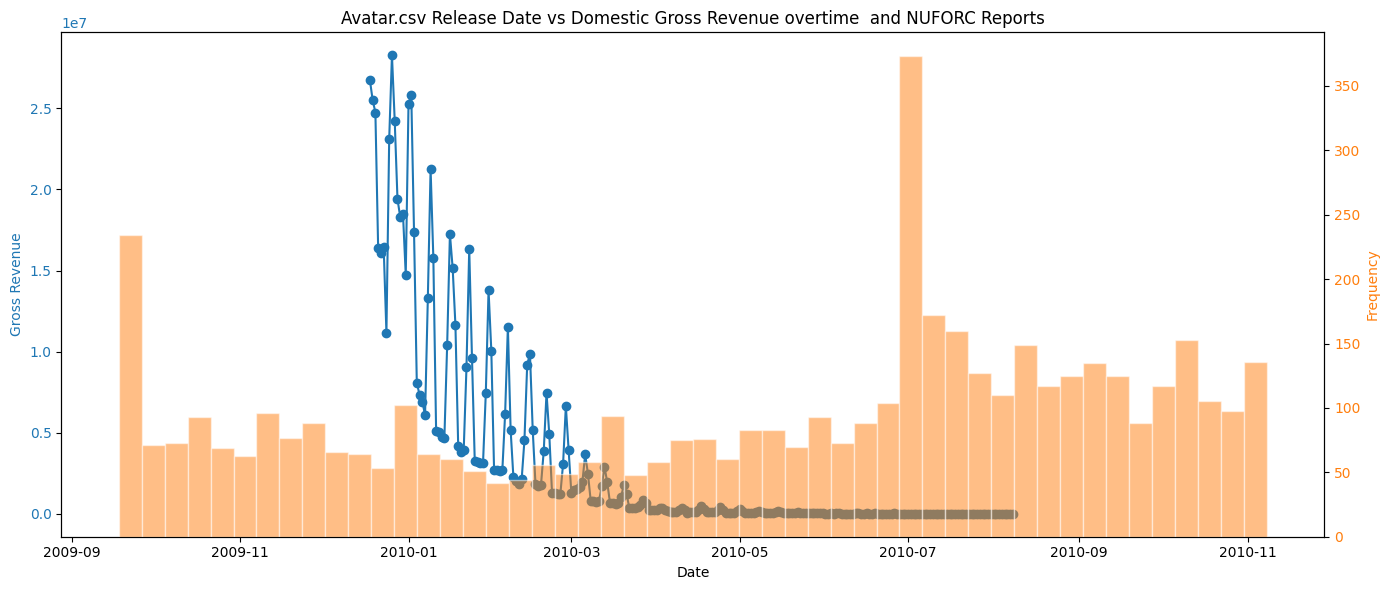

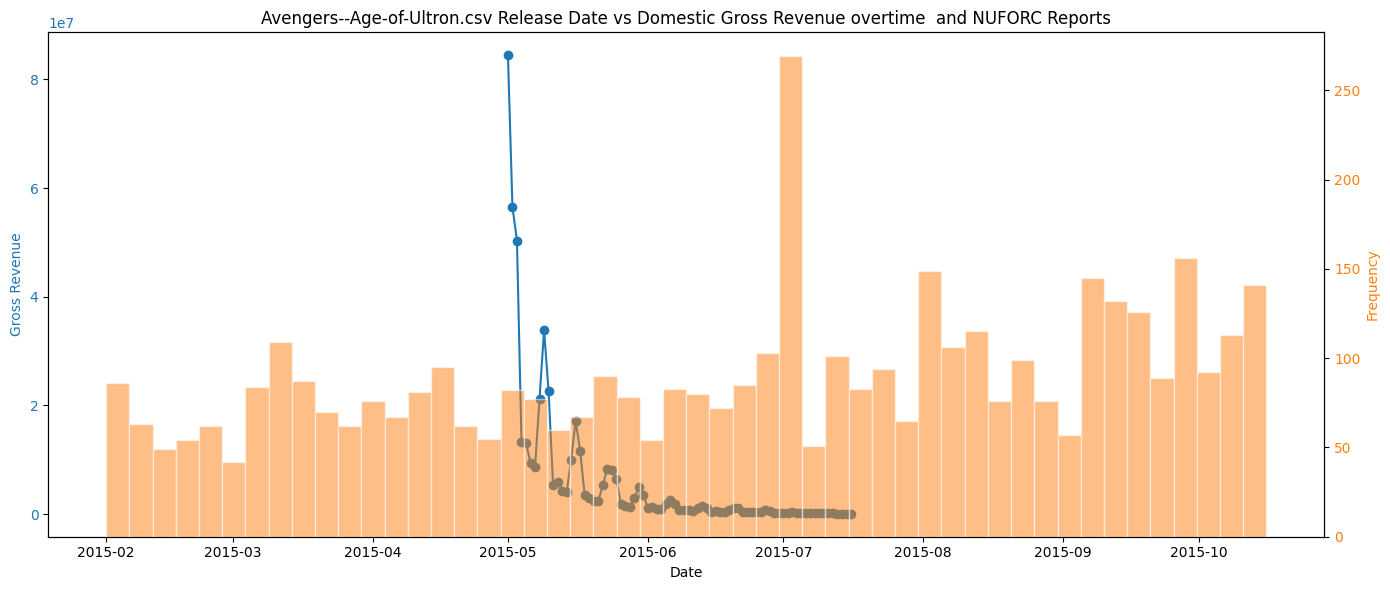

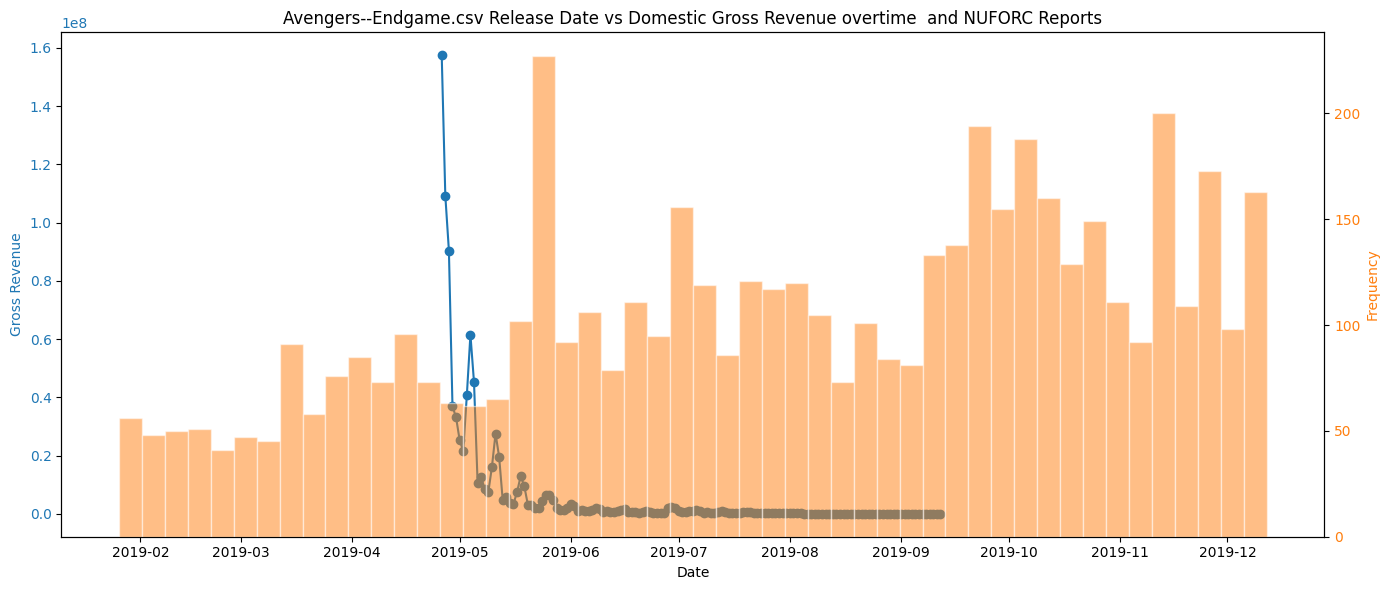

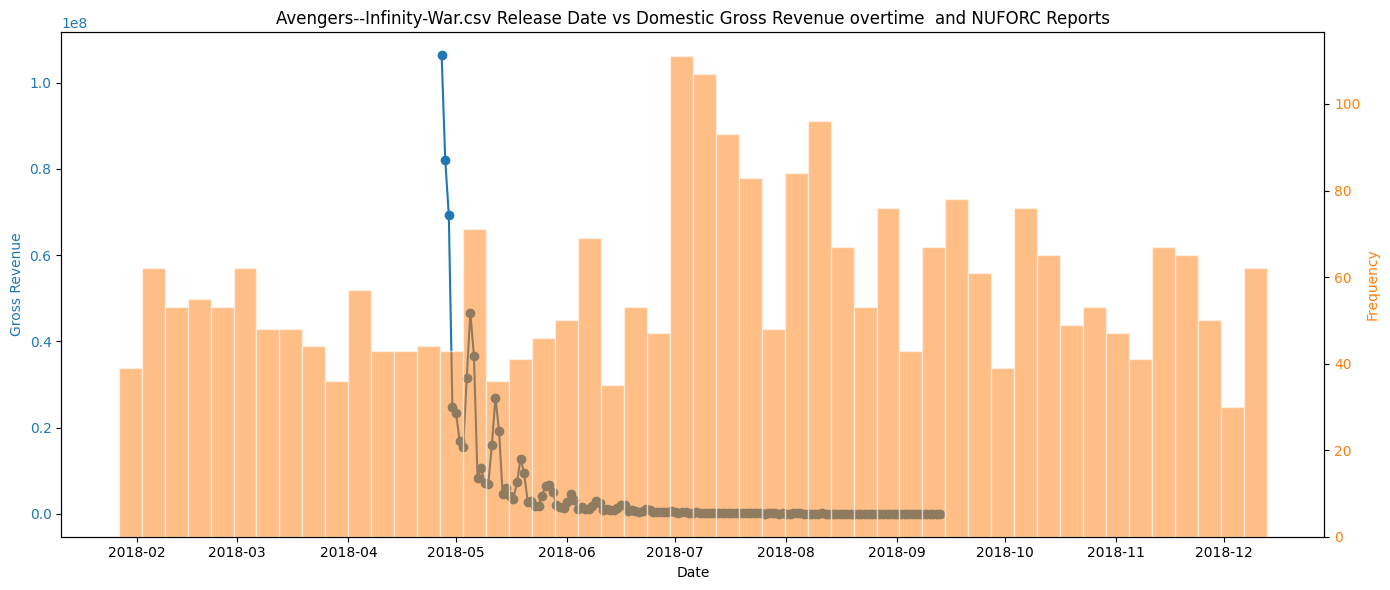

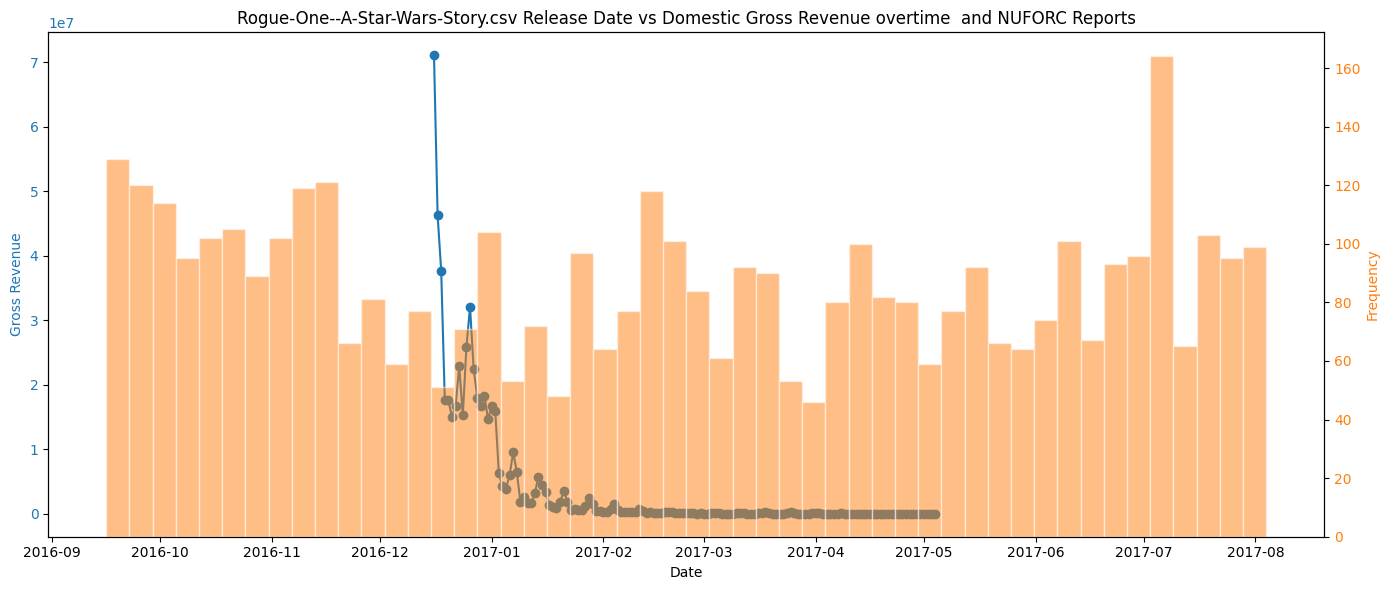

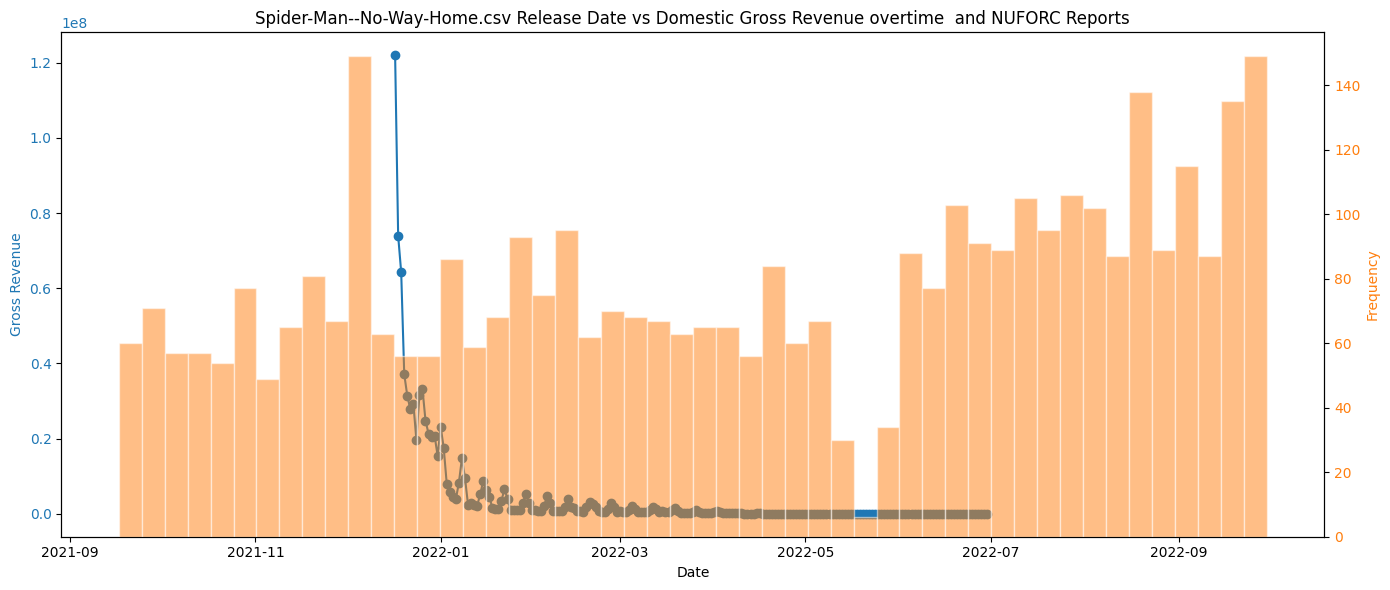

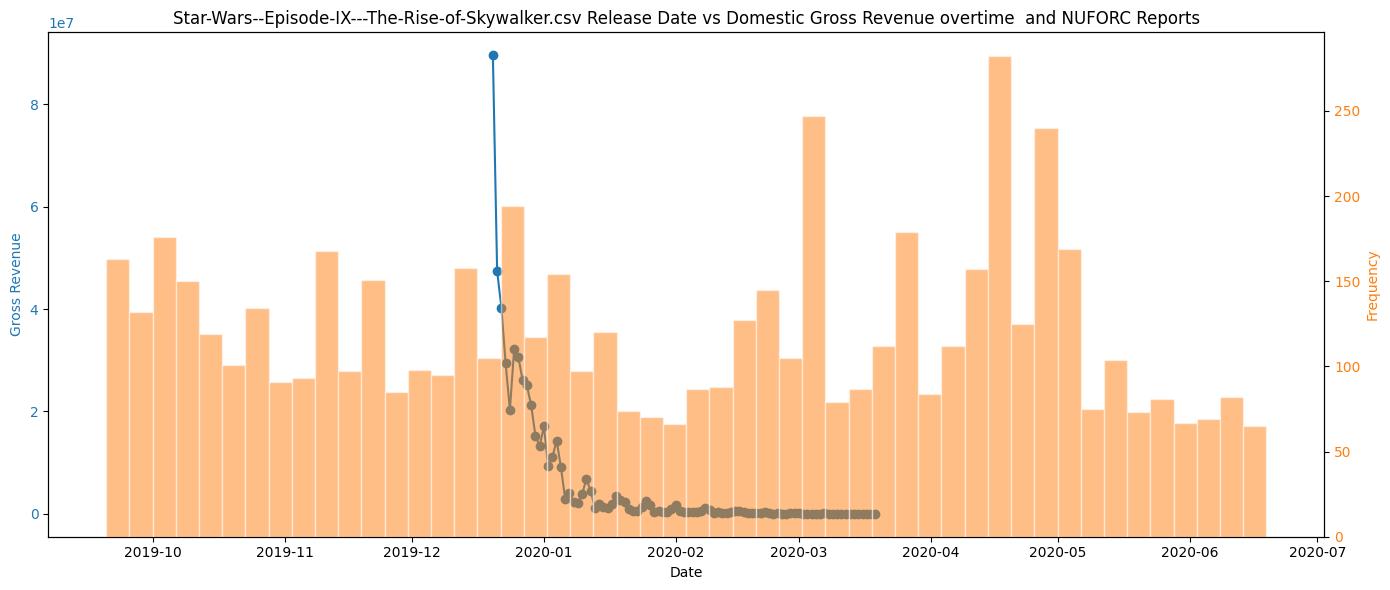

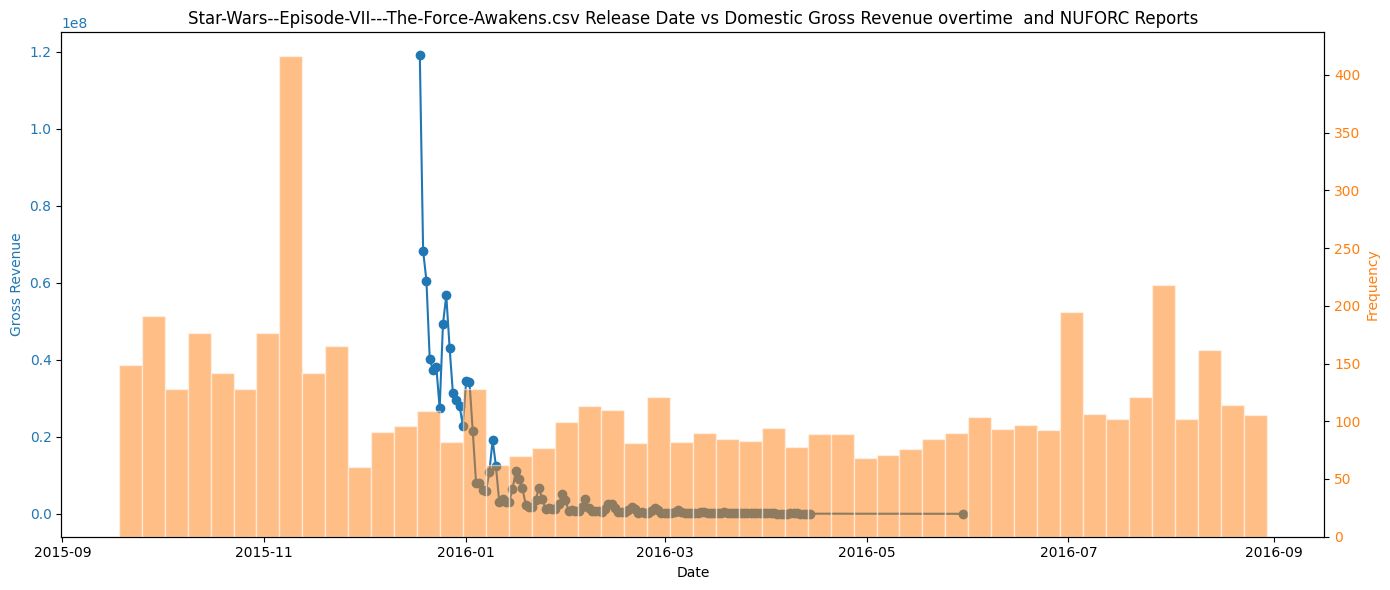

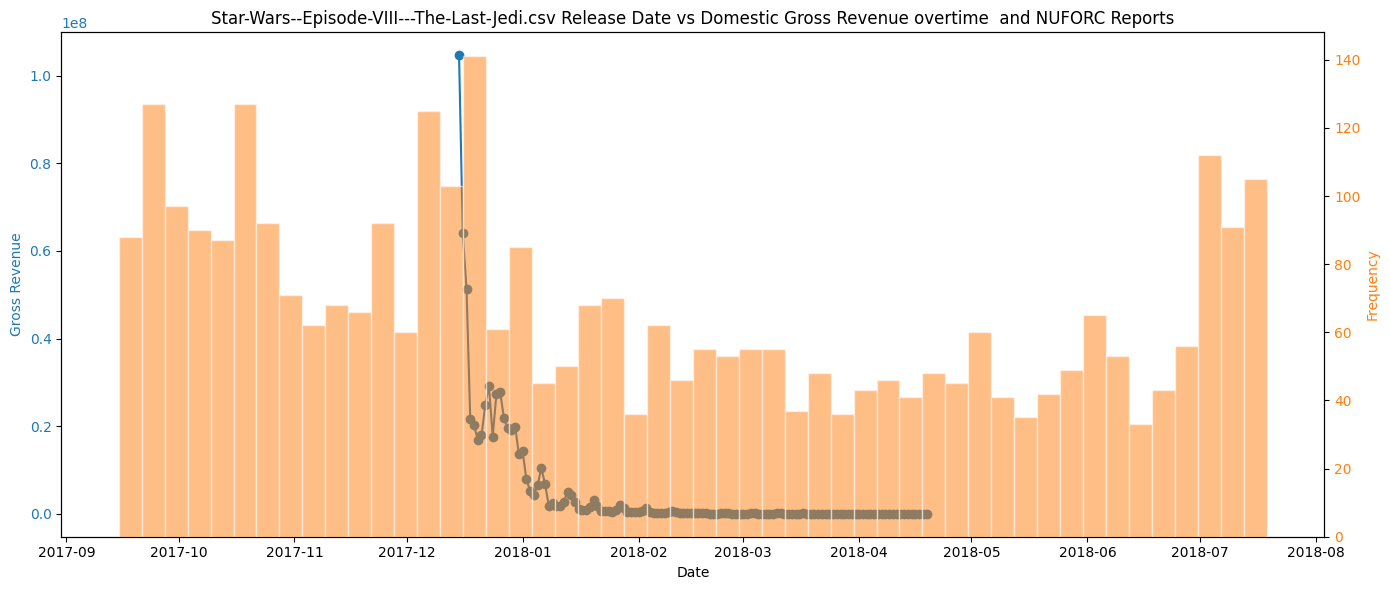

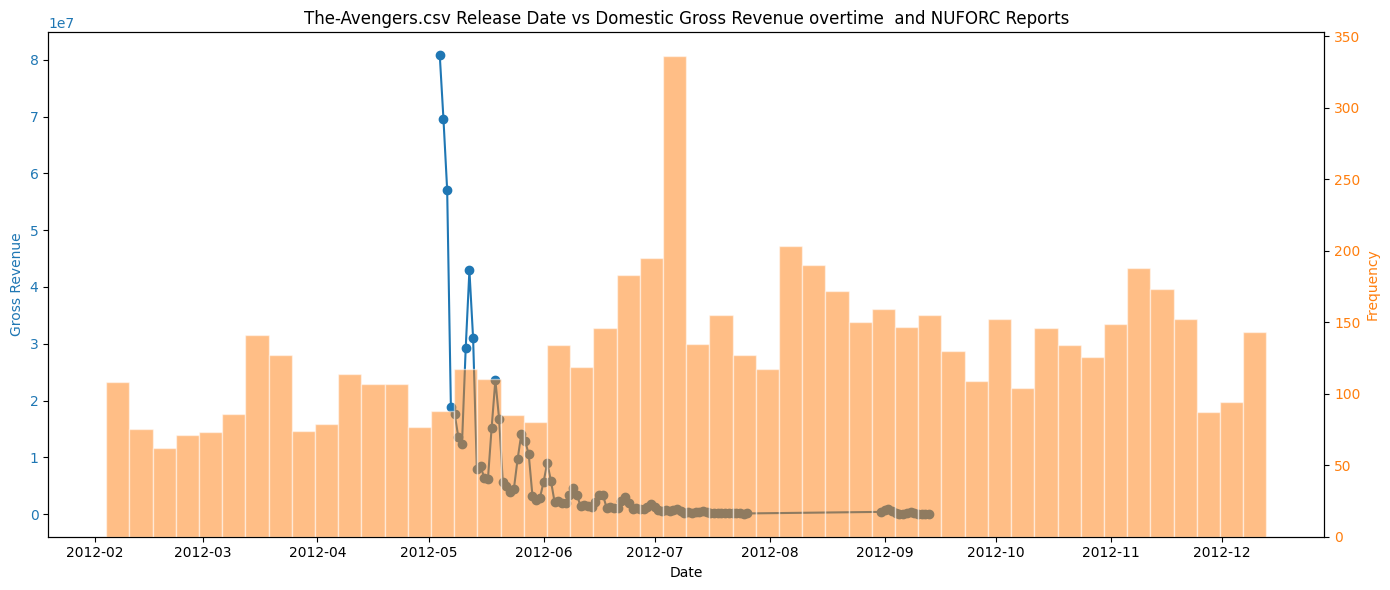

In [12]:
film_file = os.listdir()
for film in film_file:
    graph_plotter(film)

In [21]:
def r_value(moviecsv):
    # Read the data
    movie = pd.read_csv(moviecsv)
    nuforc = pd.read_csv("../../../nuforc_reports.csv")

    # Convert dates to datetime objects
    movie['date'] = pd.to_datetime(movie['date'])
    nuforc['date'] = pd.to_datetime(nuforc['date'])



    # Calculate the time range around movie's release date
    nuforc_range_start = movie['date'].min()
    nuforc_range_end = movie['date'].max() 
    nuforc_filtered = nuforc[(nuforc['date'] >= nuforc_range_start) & (nuforc['date'] <= nuforc_range_end)]

    # Group and aggregate UFO sightings data by date
    nuforc_grouped = nuforc_filtered.groupby('date').size().reset_index(name='sightings_count')

    # Merge movie data and UFO sightings data on the date
    merged_data = pd.merge(movie, nuforc_grouped, on='date', how='inner')

    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(merged_data['gross'], merged_data['sightings_count'])[0, 1]


    # Print the correlation coefficient
    print(f"Correlation Coefficient for {moviecsv}: {correlation_coefficient}")



In [22]:
films = os.listdir()

for film in films:
    r_value(film)


Correlation Coefficient for Avatar.csv: -0.09935013709720664
Correlation Coefficient for Avengers--Age-of-Ultron.csv: 0.037360098386750855
Correlation Coefficient for Avengers--Endgame.csv: -0.14056741128439887
Correlation Coefficient for Avengers--Infinity-War.csv: -0.10635210568814014
Correlation Coefficient for Rogue-One--A-Star-Wars-Story.csv: -0.08589643105502473
Correlation Coefficient for Spider-Man--No-Way-Home.csv: -0.10224333276574901
Correlation Coefficient for Star-Wars--Episode-IX---The-Rise-of-Skywalker.csv: 0.23488331841056426
Correlation Coefficient for Star-Wars--Episode-VII---The-Force-Awakens.csv: 0.020573397106431617
Correlation Coefficient for Star-Wars--Episode-VIII---The-Last-Jedi.csv: 0.23465203176009608
Correlation Coefficient for The-Avengers.csv: -0.06427572655893747
